<h1><b>Ο αλγόριθμος Πολυωνυμικής Παλινδρόμησης (Polynomial Regression)</b></h1>

<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>πολυωνυμικής παλινδρόμησης</i></b> (<b><i>polynomial regression</i></b>). Για την εκπαίδευση του μοντέλου θα χρησιμοποιήσετε τα δεδομένα του αρχείου <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab1/data2.csv">data2.csv</a></b></i>. Η εφαρμογή αφορά την εκτίμηση των τιμών της πίεσης (pressure) ενός συστήματος δεδομένης της θερμοκρασίας (temperature).</p>

<p align="justify">Στο Notebook αυτό περιλαμβάνονται εντολές για (α) τη φόρτωση των δεδομένων εκπαίδευσης που περιέχονται στο αρχείο <b><i>data2.csv</b></i>, (β) την εκπαίδευση ενός μοντέλου <b><i>linear regression</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης, (γ) την εκπαίδευση ενός μοντέλου <b><i>polynomial regression</i></b> βαθμού <b><i>degree</i></b> και την προσαρμογή του πάνω στα δεδομένα εκπαίδευσης και (δ) την οπτικοποίηση των δεδομένων εκπαίδευσης, καθώς και των γραμμών απόφασης για τα δύο μοντέλα παλινδρόμησης. Για την εκπαίδευση των δύο μοντέλων παλινδρόμησης χρησιμοποιείται η βιβλιοθήκη <b><i>Scikit-Learn</b></i> της <b><i>Python</i></b>. Περισσότερες πληροφορίες για τον αλγόριθμο <b><i>polynomial regression</i></b> και τον κώδικα της άσκησης μπορούν να βρεθούν <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">εδώ</a>.</p>

<p align="justify">Στην άσκηση αυτή, καλείστε να παρατηρήσετε τη μορφή και τις αλλαγές της γραμμής παλινδρόμησης για διαφορετικές τιμές της παραμέτρου <b><i>degree</b></i> βάσει των δεδομένων εκπαίδευσης που παρέχονται.</p>

<p align="justify">Αρχικά, θα εγκαταστήσετε και θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>


In [2]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install sklearn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Στη συνέχεια, θα φορτώσετε τα δεδομένα εκπαίδευσης που παρέχονται από το αρχείο
 <b><i>data2.csv</b></i>.

In [3]:
data = pd.read_csv('data2.csv')
print(data)

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           40    0.0500
9    10           45    0.0600
10   11           50    0.0700
11   12           55    0.0800
12   13           60    0.0900
13   14           65    0.1000
14   15           70    0.1100


Τώρα, θα δημιουργήσετε τις μεταβλητές εισόδου και εξόδου για τους αλγορίθμους μηχανικής μάθησης από τα δεδομένα εκπαίδευσης που παρέχονται.

In [4]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

print("Input")

print(X)

print("Labels")

print(y)

Input
[[ 0]
 [ 5]
 [10]
 [15]
 [20]
 [25]
 [30]
 [35]
 [40]
 [45]
 [50]
 [55]
 [60]
 [65]
 [70]]
Labels
[0.0002 0.001  0.0017 0.004  0.02   0.04   0.01   0.034  0.05   0.06
 0.07   0.08   0.09   0.1    0.11  ]


Στη συνέχεια, θα εκπαιδεύσετε το μοντέλο <b><i>linear regression</i></b>, χρησιμοποιώντας τα παραπάνω δεδομένα εκπαίδευσης.

In [5]:
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

<h3><b><i>Ερώτημα 1</b></i></h3>

<p align="justify">Να εκτελέσετε τα παρακάτω τμήματα κώδικα για τις τιμές της παραμέτρου <b><i>degree</b></i> {<i>2, 3, 4, 5, 8, 10, 12, 15</i>} και να καταγράψετε τα διαγράμματα που παρέχονται ως έξοδοι. Τι αλλαγές παρατηρείτε στη μορφή της γραμμής παλινδρόμησης για το μοντέλο <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>; Τι παρατηρείτε για τον απαιτούμενο χρόνο εκπαίδευσης του μοντέλου <b><i>polynomial regression</i></b>, καθώς αυξάνεται η τιμή της παραμέτρου <b><i>degree</i></b>;</p>

<br>

**<h4> <b><i>degree</b></i> = 2 </h4>**

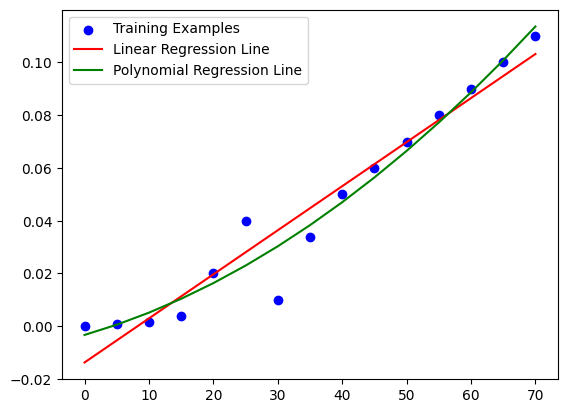

CPU times: user 488 ms, sys: 56.1 ms, total: 544 ms
Wall time: 1.06 s


In [6]:
%%time
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 3 </h4>

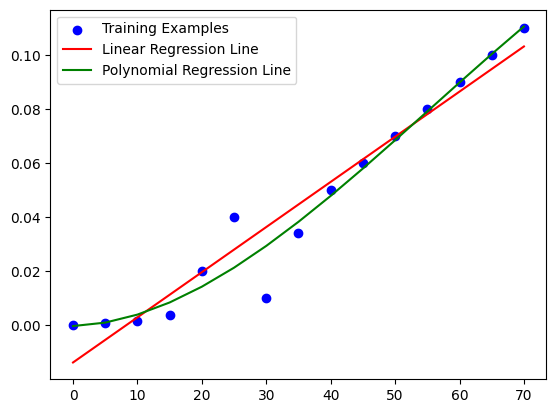

CPU times: user 308 ms, sys: 48.1 ms, total: 357 ms
Wall time: 374 ms


In [7]:
%%time
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 4 </h4>

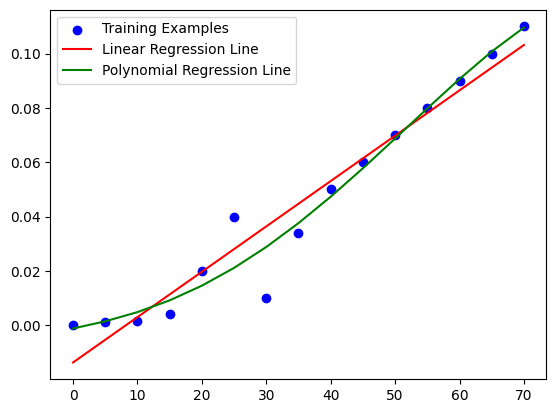

CPU times: user 340 ms, sys: 44 ms, total: 384 ms
Wall time: 475 ms


In [8]:
%%time
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 5 </h4>

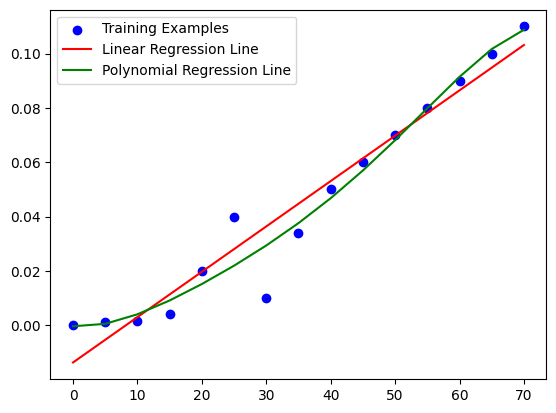

CPU times: user 360 ms, sys: 51.3 ms, total: 411 ms
Wall time: 634 ms


In [9]:
%%time
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 8 </h4>

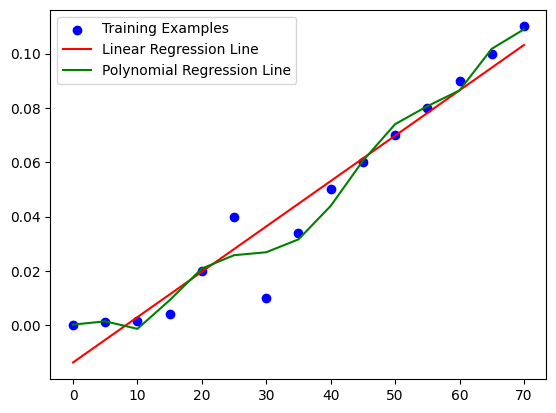

CPU times: user 328 ms, sys: 41.9 ms, total: 369 ms
Wall time: 357 ms


In [10]:
%%time
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 10 </h4>

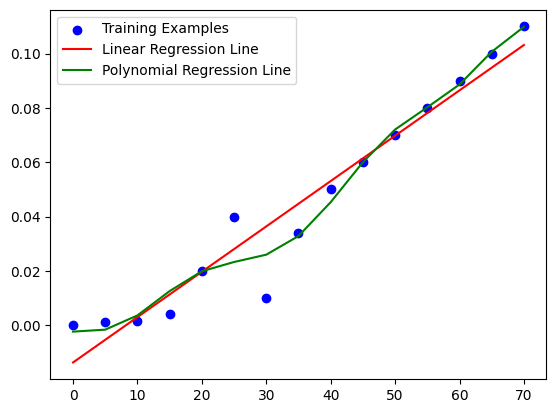

CPU times: user 248 ms, sys: 111 ms, total: 358 ms
Wall time: 262 ms


In [11]:
%%time
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 12 </h4>

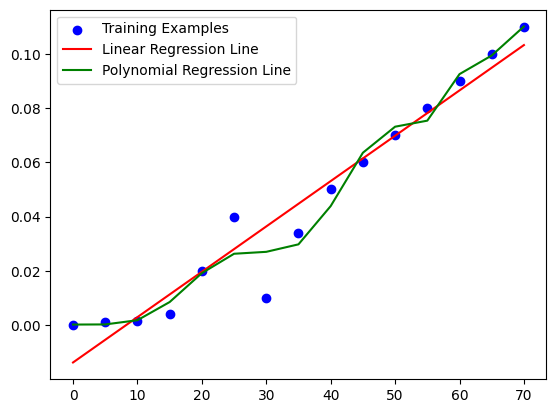

CPU times: user 358 ms, sys: 24.9 ms, total: 383 ms
Wall time: 931 ms


In [12]:
%%time
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

<h4> <b><i>degree</b></i> = 15 </h4>

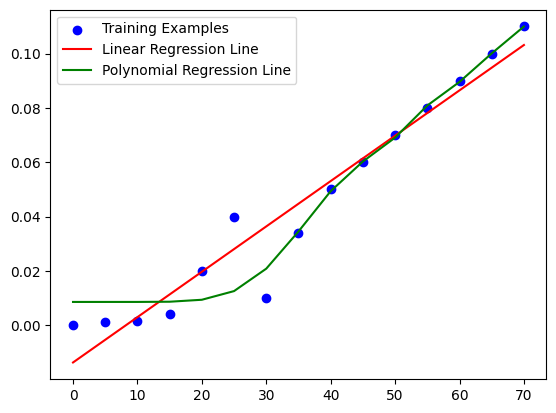

CPU times: user 257 ms, sys: 111 ms, total: 368 ms
Wall time: 250 ms


In [13]:
%%time
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

ΑΠΑΝΤΗΣΗ:

Όπως είναι εύκολα κατανοητό και αντιληπτό, καθώς αυξάνουμε το βαθμό ο χρόνος εκπαίδευσης του μοντέλου , είτε αυτό αφορά τη CPU είτε το Wall time, μειώνεται.
Επίσης, καθώς αυξάνεται ο βαθμός, παρατηρούμε αλλαγές στη καμπύλη. Για βαθμό από 2 μέχρι 5, η καμπύλη είναι όχι ίδια τουλάχιστον πανομοιότυπη.
Για βαθμό από 8 μέχρι 12, η καμπύλη παρουσιάζει κάποιες διαταραχές στις τιμές 30-40, ενώ για βαθμό 15, η καμπύλη παρουσιάζει έχει αρκετά διαφορετική μορφή σε όλο τα φάσμα των τιμών.

Όσο υψηλότερη είναι η τιμή του βαθμού, τόσο μεγαλύτερη ακρίβεια έχει η υπολογισμένη καμπύλη που προσαρμόζεται στα δεδομένα εκπαίδευσης.

Φυσικά, η υπερπροσαρμογή στα δεδομένα εκπαίδευσης δεν είναι επιθυμητή, αφού μειώνει σημαντικά την ικανότητα γενίκευσης του μοντέλου: παρότι το εκπαιδευμένο μοντέλο έχει καλή προβλεπτική ικανότητα για τα δεδομένα επάνω στα οποία έχει εκπαιδευτεί, όταν καλείται να εφαρμοστεί σε νέα δεδομένα εμφανίζει υψηλά σφάλματα. Επιπλέον, αυξάνει το βαθμό επιρροής που έχουν στο μοντέλο πιθανοί outliers που υπάρχουν στο δείγμα.

<h3><b><i>Ερώτημα 2</b></i></h3>

Σας παρέχεται, επίσης, το αρχείο <b><i>data2b.csv</i></b>, το οποίο είναι το αρχείο <b><i>data2.csv</i></b> με μία παραπάνω εγγραφή, την <b><i>(9, 38, 0.3)</i></b>. Να εκτελέσετε το παρακάτω πρόγραμμα για την τιμή της παραμέτρου <b><i>degree = 15</i></b>. Πόσο μεγάλη είναι η αλλαγή που παρατηρείτε στη μορφή της γραμμής παλινδρόμησης σε σχέση με την αντίστοιχη περίπτωση του ερωτήματος 1; Τι συμπέρασμα μπορείτε να βγάλετε για τον αλγόριθμο <b><i>polynomial regression</i></b>;

    sno  Temperature  Pressure
0     1            0    0.0002
1     2            5    0.0010
2     3           10    0.0017
3     4           15    0.0040
4     5           20    0.0200
5     6           25    0.0400
6     7           30    0.0100
7     8           35    0.0340
8     9           38    0.3000
9    10           40    0.0500
10   11           45    0.0600
11   12           50    0.0700
12   13           55    0.0800
13   14           60    0.0900
14   15           65    0.1000
15   16           70    0.1100


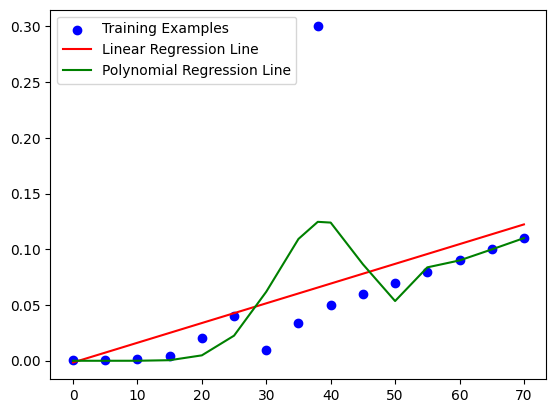

CPU times: user 372 ms, sys: 45.6 ms, total: 417 ms
Wall time: 465 ms


In [16]:
%%time
data = pd.read_csv('data2b.csv')
print(data)

X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

lin = LinearRegression()
lin.fit(X, y)

poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

plt.scatter(X, y, color = 'blue', label = 'Training Examples')

plt.plot(X, lin.predict(X), color = 'red', label = 'Linear Regression Line')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green', label = 'Polynomial Regression Line')
plt.legend()
plt.show()

ΑΠΑΝΤΗΣΗ:

Η αλλαγή  στη μορφή της γραμμής παλινδρόμησης σε σχέση με την αντίστοιχη περίπτωση του ερωτήματος 1 είναι πολύ μεγάλη.  Το γεγονός αυτό οφείλεται στην προαναφερθείσα υπερπροσαρμογή του μοντέλου στα δεδομένα.Η υπερπροσαρμογή συμβαίνει όταν το μοντέλο εκπαιδεύεται τόσο πολύ στα δεδομένα εκπαίδευσης ώστε να μάθει τις λεπτομέρειες και το θόρυβο των δεδομένων αντί να αντιληφθεί τη γενική τάση των δεδομένων. Αυτό μπορεί να οδηγήσει σε κακή απόδοση του μοντέλου σε νέα δεδομένα. Έτσι, η καμπύλη παραμορφώνεται σημαντικά, αυξάνοντας την απόστασή της από 4 σημεία εκπαίδευσης, στην προσπάθειά της να «πλησιάσει» το νέο αυτό σημείο, προκειμένου να μειώσει το μέσο τετραγωνικό σφάλμα.